<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 1: Income, Poverty, and Wealth: Their Impact on Life Expectancy

--- 
# Part 1

Part 1 requires knowledge of basic Python.

---

## Problem Statement

The COVID-19 pandemic gravely impacted the lives of many people worldwide. It dealt the “biggest setback” to the 21st century [(The World Bank)](https://www.worldbank.org/en/news/podcast/2022/12/01/global-poverty-reduction-shared-prosperity-report-development-podcast). If we can understand the ways countries were affected when it occurred, we can develop better health outcomes for those countries. I hypothesized that financial disparities, as reflected by global income levels, directly affected life expectancy during COVID. The aim of this study is to investigate whether nations classified as low income also exhibit lower life expectancy and faced challenges in paying for healthcare services when COVID started in 2019.


### Contents:
- [Background](#Background)
- [Data Import & Cleaning](#Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-Data)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

## Background

For our first project, we're going to take a look at World Development Statistics from [Gapminder](https://www.gapminder.org/about/), an independent Swedish foundation that aims to make data about the world more accessible and reliable. A good introduction on Gapminder is this [Ted Talk](https://www.ted.com/talks/hans_rosling_the_best_stats_you_ve_ever_seen) from Hans Rosling, which also shows how effective data visualization can be for your audience. 

I used life expectancy, and gross national income data from Gapminder, and also used Out-of-pocket Healthcare Expenditure data from the [Global Health Expenditure Database](https://apps.who.int/nha/database/Select/Indicators/en). 

### Datasets Used:
* [`life_expectancy.csv`](../data/life_expectancy.csv): Life Expectancy by Country
* [`gni_per_cap_atlas_method_con2021.csv`](../data/gni_per_cap_atlas_method_con2021.csv): Gross National Income (GNI) per capita in current US dollars
* [`oop_expend_per_cap.csv`](../data/oop_expend_per_cap.csv): Out-of-pocket Expenditure (OOPE) per capita in millions US$

### Outside Research

In order to group countries by income levels, I used income level classifications from the [Global Health Observatory (GHO)](https://www.who.int/data/gho/indicator-metadata-registry/imr-details/193#:~:text=World%20Development%20Indicators%20database%3A%20Low,is%20%2412%20745%20or%20more.). Their indicator is based on the World Development Indicator which already uses GNI per capita to make categorizations. Classifications are as follows: low income is earning \\$1,045 or less, middle income is earning \\$1,046 to \\$12745, high income is earning \\$12,745 or more. I also found that the World Bank reported an increase in extreme poverty since the pandemic started. Furthermore, an [NIH study](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6153391/#:~:text=On%20average%2C%20life%20expectancy%20at,and%20LEAB%2066.77%20%C2%B1%208.59) suggested universal healthcare (UHC) was shown to have a higher affect on life expectancy (p < 0.001) than in countries that didn't have UHC.

### Coding Challenges

1. Manually calculate mean:

    Write a function that takes in values and returns the mean of the values. Create a list of numbers that you test on your function to check to make sure your function works!
    
    *Note*: Do not use any mean methods built-in to any Python libraries to do this! This should be done without importing any additional libraries.

In [51]:
my_list = list(range(1,18))
my_list

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]

In [52]:
def mean_of_values(values):
    mean = sum(values)/len(values)
    return mean

mean_of_values(my_list)

9.0

2. Manually calculate standard deviation:

    The formula for standard deviation is below:

    $$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

    Where $x_i$ represents each value in the dataset, $\mu$ represents the mean of all values in the dataset and $n$ represents the number of values in the dataset.

    Write a function that takes in values and returns the standard deviation of the values using the formula above. Hint: use the function you wrote above to calculate the mean! Use the list of numbers you created above to test on your function.
    
    *Note*: Do not use any standard deviation methods built-in to any Python libraries to do this! This should be done without importing any additional libraries.

In [53]:
def stdev(values):
    var = sum((value - mean_of_values(values))**2 for value in values) / len(values)
    stdev = var**0.5
    return stdev

stdev(my_list)

4.898979485566356

3. Data cleaning function:
    
    Write a function that takes in a string consisting a number and an abbreviated place value (ex. '5M', '45K'), and converts that string to an integer. For example, inputting '5M' in your function should return 5000000, '45K' should return 45000, etc. Make sure to test your function to make sure it works!

You will use these functions later on in the project!

In [54]:
def numbers_with_string_displayer(value):
    value = str(value)
    abbr = value[-1]
    if abbr in 'kK':
        number = float(value[0:-1])
        return int(number * 1000)
    elif abbr in 'mM':
        number = float(value[0:-1])
        return int(number * 1000000)
    elif abbr in 'bB':
        number = float(value[0:-1])
        return int(number * 1000000000)
    return float(value)

numbers_with_string_displayer('45B')

45000000000

--- 
# Part 2

Part 2 requires knowledge of Pandas, EDA, data cleaning, and data visualization.

---

*All libraries used should be added here*

In [55]:
# Importing libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Import and Cleaning

### Data Import & Cleaning

Import the datasets that you selected for this project and go through the following steps at a minimum. You are welcome to do further cleaning as you feel necessary:
1. Display the data: print the first 5 rows of each dataframe to your Jupyter notebook.
2. Check for missing values.
3. Check for any obvious issues with the observations (keep in mind reasonable values for each column).
4. Fix any errors you identified in steps 2-3.
5. Display the data types of each feature.
6. Fix any incorrect data types found in step 5.
    - Fix any individual values preventing other columns from being the appropriate type.
    - If your dataset has a column of abbreviated numbers (ex. '3M', '45K', etc.), use the function you wrote in Part 1 (coding challenges, number 3) to convert this to integers! *Hint*: use `.map()` or `.apply()`.
7. Rename Columns.
    - Column names should be all lowercase.
    - Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`).
    - Column names should be unique and informative.
8. Drop unnecessary rows (if needed).
9. Merge dataframes that can be merged.
10. Perform any additional cleaning that you feel is necessary.
11. Save your cleaned and merged dataframes as csv files.

In [99]:
#importing datasets
life_expect_df = pd.read_csv('../data/life_expectancy.csv') #to find life longevity
nat_income_df = pd.read_csv('../data/gni_per_cap_atlas_method_con2021.csv') #avg income earned per person
oope_df = pd.read_csv('../data/oop_expend_per_cap.csv') #to see how much people are spending for things outside of what insurance covers

In [57]:
#life expectancy dataframe display with lowercase column names
life_expect_df.columns = life_expect_df.columns.str.lower()
life_expect_df.head(5)

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
0,Afghanistan,28.2,28.2,28.2,28.2,28.2,28.2,28.1,28.1,28.1,...,75.5,75.7,75.8,76.0,76.1,76.2,76.4,76.5,76.6,76.8
1,Angola,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,...,78.8,79.0,79.1,79.2,79.3,79.5,79.6,79.7,79.9,80.0
2,Albania,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,...,87.4,87.5,87.6,87.7,87.8,87.9,88.0,88.2,88.3,88.4
3,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,United Arab Emirates,30.7,30.7,30.7,30.7,30.7,30.7,30.7,30.7,30.7,...,82.4,82.5,82.6,82.7,82.8,82.9,83.0,83.1,83.2,83.3


In [58]:
#calculating null values in each column
life_expect_df.isna().sum()

country    0
1800       9
1801       9
1802       9
1803       9
          ..
2096       9
2097       9
2098       9
2099       9
2100       9
Length: 302, dtype: int64

In [59]:
#bc there is a small number of missing values, especially for entire rows for specific countries, i will drop them from the dataframe
life_expect_df.dropna(inplace = True)
life_expect_df.head(5)

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
0,Afghanistan,28.2,28.2,28.2,28.2,28.2,28.2,28.1,28.1,28.1,...,75.5,75.7,75.8,76.0,76.1,76.2,76.4,76.5,76.6,76.8
1,Angola,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,...,78.8,79.0,79.1,79.2,79.3,79.5,79.6,79.7,79.9,80.0
2,Albania,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,...,87.4,87.5,87.6,87.7,87.8,87.9,88.0,88.2,88.3,88.4
4,United Arab Emirates,30.7,30.7,30.7,30.7,30.7,30.7,30.7,30.7,30.7,...,82.4,82.5,82.6,82.7,82.8,82.9,83.0,83.1,83.2,83.3
5,Argentina,33.2,33.2,33.2,33.2,33.2,33.2,33.2,33.2,33.2,...,86.2,86.3,86.5,86.5,86.7,86.8,86.9,87.0,87.1,87.2


In [60]:
#showing datatypes for the dataframe to make sure everything checks out
life_expect_df.dtypes

country     object
1800       float64
1801       float64
1802       float64
1803       float64
            ...   
2096       float64
2097       float64
2098       float64
2099       float64
2100       float64
Length: 302, dtype: object

In [61]:
#gross national income dataframe display with lowercase column names
nat_income_df.columns = nat_income_df.columns.str.lower()
nat_income_df.head(5)

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2041,2042,2043,2044,2045,2046,2047,2048,2049,2050
0,Afghanistan,207.0,207.0,207.0,207.0,207.0,207.0,207.0,207.0,207.0,...,751,767,783,800,817,834,852,870,888,907
1,Angola,517.0,519.0,522.0,524.0,525.0,528.0,531.0,533.0,536.0,...,2770,2830,2890,2950,3010,3080,3140,3210,3280,3340
2,Albania,207.0,207.0,207.0,207.0,207.0,207.0,207.0,207.0,207.0,...,9610,9820,10k,10.2k,10.5k,10.7k,10.9k,11.1k,11.4k,11.6k
3,United Arab Emirates,738.0,740.0,743.0,746.0,749.0,751.0,754.0,757.0,760.0,...,47.9k,48.9k,50k,51k,52.1k,53.2k,54.3k,55.5k,56.7k,57.9k
4,Argentina,794.0,797.0,799.0,802.0,805.0,808.0,810.0,813.0,816.0,...,12.8k,13.1k,13.4k,13.6k,13.9k,14.2k,14.5k,14.8k,15.2k,15.5k


In [62]:
nat_income_df.isna().sum()

country    0
1800       1
1801       1
1802       1
1803       1
          ..
2046       1
2047       1
2048       1
2049       1
2050       1
Length: 252, dtype: int64

In [63]:
nat_income_df.dtypes

country     object
1800       float64
1801       float64
1802       float64
1803       float64
            ...   
2046        object
2047        object
2048        object
2049        object
2050        object
Length: 252, dtype: object

In [64]:
#the datatype doesnt match for all columns. this is bc of numeric value abbreviations as seen in the dataframe displays
#i will convert those abbreviations to display the numeric values entirely so the column/dtypes can coincide

str_col = 'country'
int_cols = nat_income_df.loc[:,nat_income_df.columns != str_col] 

for int_col in int_cols:
    nat_income_df[int_col] = nat_income_df[int_col].apply(numbers_with_string_displayer)

In [65]:
nat_income_df.dtypes

country     object
1800       float64
1801       float64
1802       float64
1803       float64
            ...   
2046       float64
2047       float64
2048       float64
2049       float64
2050       float64
Length: 252, dtype: object

In [66]:
nat_income_df.isna().sum()

country    0
1800       1
1801       1
1802       1
1803       1
          ..
2046       1
2047       1
2048       1
2049       1
2050       1
Length: 252, dtype: int64

In [67]:
#replacing nulls with median column values in case there are null values outside of display
nat_income_median = nat_income_df.select_dtypes(include ='number').median()
nat_income_df = nat_income_df.fillna(np.nan)
nat_income_df = nat_income_df.fillna(nat_income_median)
nat_income_df.head(5)

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2041,2042,2043,2044,2045,2046,2047,2048,2049,2050
0,Afghanistan,207.0,207.0,207.0,207.0,207.0,207.0,207.0,207.0,207.0,...,751.0,767.0,783.0,800.0,817.0,834.0,852.0,870.0,888.0,907.0
1,Angola,517.0,519.0,522.0,524.0,525.0,528.0,531.0,533.0,536.0,...,2770.0,2830.0,2890.0,2950.0,3010.0,3080.0,3140.0,3210.0,3280.0,3340.0
2,Albania,207.0,207.0,207.0,207.0,207.0,207.0,207.0,207.0,207.0,...,9610.0,9820.0,10000.0,10200.0,10500.0,10700.0,10900.0,11100.0,11400.0,11600.0
3,United Arab Emirates,738.0,740.0,743.0,746.0,749.0,751.0,754.0,757.0,760.0,...,47900.0,48900.0,50000.0,51000.0,52100.0,53200.0,54300.0,55500.0,56700.0,57900.0
4,Argentina,794.0,797.0,799.0,802.0,805.0,808.0,810.0,813.0,816.0,...,12800.0,13100.0,13400.0,13600.0,13900.0,14200.0,14500.0,14800.0,15200.0,15500.0


In [68]:
#oope dataframe display with lower case column names 
oope_df.columns = oope_df.columns.str.lower()
oope_df.head(5)

,countries,indicators,unnamed: 2,2000,2001,2002,2003,2004,2005,2006,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,NaN,NaN,NaN,Value,Value,Value,Value,Value,Value,Value,...,Value,Value,Value,Value,Value,Value,Value,Value,Value,Value
1,Algeria,Out-of-Pocket Expenditure (OOPS) per Capita in...,NaN,16,15,15,16,24,28,34,...,92,96,83,81,84,84,84,77,79,NaN
2,Angola,Out-of-Pocket Expenditure (OOPS) per Capita in...,NaN,4,13,14,17,23,23,21,...,31,35,36,33,39,30,21,15,15,NaN
3,Benin,Out-of-Pocket Expenditure (OOPS) per Capita in...,NaN,8,8,9,11,12,12,13,...,15,16,15,14,15,16,15,16,17,NaN
4,Botswana,Out-of-Pocket Expenditure (OOPS) per Capita in...,NaN,21,19,18,23,25,23,21,...,16,15,13,12,13,21,18,18,20,NaN


In [69]:
#using function to get indexes for the Unnamed:2, Indicators, and 2022 column im going to drop
def col_idx(column_name):
    index = oope_df.columns.get_loc(column_name)
    return index

col_idx('2022')

25

In [70]:
#dropping first row (0th idx) since its unpertaining to dataset 
oope_df = oope_df.drop(oope_df.index[[0]], axis=0)

#dropping unnamed: 2 column since its unpertaining to dataset, and the indicator column since it's irrelevant (indexes come from using above function)
oope_df = oope_df.drop(oope_df.columns[[1, 2, 25]], axis=1)
oope_df = oope_df.reset_index(drop=True)
oope_df.head(5)

,countries,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Algeria,16,15,15,16,24,28,34,43,54,...,87,92,96,83,81,84,84,84,77,79
1,Angola,4,13,14,17,23,23,21,26,29,...,21,31,35,36,33,39,30,21,15,15
2,Benin,8,8,9,11,12,12,13,13,13,...,14,15,16,15,14,15,16,15,16,17
3,Botswana,21,19,18,23,25,23,21,20,18,...,17,16,15,13,12,13,21,18,18,20
4,Burkina Faso,3,3,3,4,5,5,6,7,9,...,11,14,13,12,12,14,14,14,19,20


In [71]:
oope_df.dtypes

countries    object
2000         object
2001         object
2002         object
2003         object
2004         object
2005         object
2006         object
2007         object
2008         object
2009         object
2010         object
2011         object
2012         object
2013         object
2014         object
2015         object
2016         object
2017         object
2018         object
2019         object
2020         object
2021         object
dtype: object

In [72]:
#converting values in columns to make dtypes reflect what they should be using a function
not_num = 'countries'
num_cols = oope_df.loc[:, oope_df.columns != not_num] 

def comma_replacer(column):
    if column.dtype == 'object':
        return column.str.replace(",", "")
    else:
        return column
    
oope_df[num_cols.columns] = oope_df[num_cols.columns].apply(comma_replacer).astype(float)

In [73]:
oope_df.dtypes

countries     object
2000         float64
2001         float64
2002         float64
2003         float64
2004         float64
2005         float64
2006         float64
2007         float64
2008         float64
2009         float64
2010         float64
2011         float64
2012         float64
2013         float64
2014         float64
2015         float64
2016         float64
2017         float64
2018         float64
2019         float64
2020         float64
2021         float64
dtype: object

In [74]:
#replacing nulls with median column values in case there are null values outside of display
oope_df_median = oope_df.select_dtypes(include ='number').median()
oope_df = oope_df.fillna(np.nan)
oope_df = oope_df.fillna(oope_df_median)
oope_df.head(5)

,countries,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Algeria,16.0,15.0,15.0,16.0,24.0,28.0,34.0,43.0,54.0,...,87.0,92.0,96.0,83.0,81.0,84.0,84.0,84.0,77.0,79.0
1,Angola,4.0,13.0,14.0,17.0,23.0,23.0,21.0,26.0,29.0,...,21.0,31.0,35.0,36.0,33.0,39.0,30.0,21.0,15.0,15.0
2,Benin,8.0,8.0,9.0,11.0,12.0,12.0,13.0,13.0,13.0,...,14.0,15.0,16.0,15.0,14.0,15.0,16.0,15.0,16.0,17.0
3,Botswana,21.0,19.0,18.0,23.0,25.0,23.0,21.0,20.0,18.0,...,17.0,16.0,15.0,13.0,12.0,13.0,21.0,18.0,18.0,20.0
4,Burkina Faso,3.0,3.0,3.0,4.0,5.0,5.0,6.0,7.0,9.0,...,11.0,14.0,13.0,12.0,12.0,14.0,14.0,14.0,19.0,20.0


In [75]:
#renaming oope dataframe so it could be mereged on a comonality
oope_df.rename(columns = {'countries': 'country'}, inplace = True)
oope_df.head(5)

,country,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Algeria,16.0,15.0,15.0,16.0,24.0,28.0,34.0,43.0,54.0,...,87.0,92.0,96.0,83.0,81.0,84.0,84.0,84.0,77.0,79.0
1,Angola,4.0,13.0,14.0,17.0,23.0,23.0,21.0,26.0,29.0,...,21.0,31.0,35.0,36.0,33.0,39.0,30.0,21.0,15.0,15.0
2,Benin,8.0,8.0,9.0,11.0,12.0,12.0,13.0,13.0,13.0,...,14.0,15.0,16.0,15.0,14.0,15.0,16.0,15.0,16.0,17.0
3,Botswana,21.0,19.0,18.0,23.0,25.0,23.0,21.0,20.0,18.0,...,17.0,16.0,15.0,13.0,12.0,13.0,21.0,18.0,18.0,20.0
4,Burkina Faso,3.0,3.0,3.0,4.0,5.0,5.0,6.0,7.0,9.0,...,11.0,14.0,13.0,12.0,12.0,14.0,14.0,14.0,19.0,20.0


In [76]:
#had to come back and add this step: renaming the oope dataframe so united states can appear in the merge
oope_df['country'] = oope_df['country'].replace('United States of America', 'United States')

In [77]:
merged_dfs = pd.merge(life_expect_df,nat_income_df, on = 'country', how = 'inner', suffixes = ('_life','_gni'))
merged_dfs.head(5)

#merging with oope dataframe with
merged_dfs = pd.merge(merged_dfs, oope_df, on = 'country', how = 'inner')
merged_dfs.head(5)

,country,1800_life,1801_life,1802_life,1803_life,1804_life,1805_life,1806_life,1807_life,1808_life,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Afghanistan,28.2,28.2,28.2,28.2,28.2,28.2,28.1,28.1,28.1,...,39.0,41.0,44.0,47.0,47.0,51.0,54.0,57.0,60.0,63.0
1,Angola,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,...,21.0,31.0,35.0,36.0,33.0,39.0,30.0,21.0,15.0,15.0
2,Albania,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,...,153.0,161.0,175.0,146.0,157.0,170.0,198.0,207.0,236.0,277.0
3,United Arab Emirates,30.7,30.7,30.7,30.7,30.7,30.7,30.7,30.7,30.7,...,248.0,275.0,295.0,256.0,256.0,197.0,243.0,254.0,246.0,245.0
4,Argentina,33.2,33.2,33.2,33.2,33.2,33.2,33.2,33.2,33.2,...,355.0,380.0,346.0,395.0,340.0,318.0,306.0,243.0,195.0,234.0


###### **Note**: Because I am merging my oope dataframe to my already merged df, my oope dataframe will no longer reflect suffixes. Thus, the column names shown in the display that are without suffixes are the columns that represent out-of-pocket expenditure (OOPE) data values.

In [78]:
#Save your cleaned and merged dataframes as csv files
csv_file = 'merged_dataframes.csv'
merged_dfs.to_csv(csv_file)

### Data Dictionary

|Feature|Type|Dataset|Description|
|---|---|---|---|
|country|object|found  in all datasets|Name of the country for which the data is from| 
|1800_gin|object|merged_dataframes.csv|Gross National Income per capita for the year the data is from| 
|1800_lfie|int|merged_dataframes.csv|Life Expenditure as ages per capita for which the data is from| 
|1800|int|merged_dataframes.csv|Out-of-pocket healthcare expenditure per capita in Millions US$ for which the data is from


## Exploratory Data Analysis

In [79]:
#Summary Statistics.
merged_dfs.describe()

,1800_life,1801_life,1802_life,1803_life,1804_life,1805_life,1806_life,1807_life,1808_life,1809_life,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
count,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,...,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000
mean,31.600000,31.559355,31.571613,31.466452,31.530323,31.675484,31.738710,31.704516,31.446452,31.351613,...,219.961290,227.625806,232.032258,211.174194,214.419355,223.787097,234.296774,231.993548,224.761290,244.090323
std,3.759041,3.763507,3.908727,3.953402,3.864883,3.938626,4.041447,3.938411,4.065986,3.990189,...,312.926735,321.257940,325.693195,294.538471,297.856801,310.525926,321.415259,317.124079,313.519031,343.645626
min,24.000000,24.000000,24.000000,19.600000,23.500000,24.000000,24.000000,24.000000,12.500000,13.400000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,0.000000
25%,29.150000,29.050000,28.950000,28.950000,29.050000,29.150000,29.150000,29.150000,29.050000,28.900000,...,27.000000,29.000000,29.500000,28.000000,27.500000,28.000000,28.500000,27.000000,27.000000,28.500000
50%,31.700000,31.500000,31.500000,31.400000,31.500000,31.500000,31.700000,31.700000,31.500000,31.400000,...,102.000000,98.000000,97.000000,94.000000,88.000000,92.000000,95.000000,103.000000,97.000000,103.000000
75%,34.000000,34.000000,34.000000,33.800000,33.950000,33.950000,34.000000,34.000000,33.950000,33.800000,...,250.000000,263.000000,285.500000,247.500000,254.500000,272.000000,288.500000,277.000000,296.000000,287.000000
max,42.900000,40.300000,44.400000,44.800000,42.800000,44.300000,45.800000,43.600000,43.500000,40.400000,...,2190.000000,2259.000000,2266.000000,2174.000000,2115.000000,2135.000000,2188.000000,2221.000000,2309.000000,2474.000000


In [80]:
# Use a dictionary comprehension to apply the standard deviation function 
#you create in part 1 to each numeric column in one of your dataframes. No loops.

sd = {column: stdev(merged_dfs[column]) for column in merged_dfs.select_dtypes(include=np.number)}
sd

{'1800_life': 3.746895489128515,
 '1801_life': 3.7513472293803747,
 '1802_life': 3.8960982109683666,
 '1803_life': 3.9406283667808664,
 '1804_life': 3.852395554566659,
 '1805_life': 3.925899805394672,
 '1806_life': 4.028389369923517,
 '1807_life': 3.9256861645632184,
 '1808_life': 4.052848897151553,
 '1809_life': 3.977296128693132,
 '1810_life': 3.8223339514789276,
 '1811_life': 3.706212350850147,
 '1812_life': 3.801076029261836,
 '1813_life': 3.669830539884263,
 '1814_life': 3.7836619033078507,
 '1815_life': 4.090494246931921,
 '1816_life': 4.084776437356661,
 '1817_life': 4.321298606220208,
 '1818_life': 4.715775548290253,
 '1819_life': 4.714299102196845,
 '1820_life': 4.5877212949939645,
 '1821_life': 3.979548968111108,
 '1822_life': 4.267808304167823,
 '1823_life': 4.407612183630761,
 '1824_life': 4.216752971084116,
 '1825_life': 4.154676214013343,
 '1826_life': 4.056770397273115,
 '1827_life': 4.15761778425559,
 '1828_life': 3.914148726062905,
 '1829_life': 3.8606003102449056,
 '1

*I will now start investigating trends in the data.*

**What is the income levels for countries leading up to COVID?**

In [81]:
#creating an income level function to apply to the dataframe
#used link to know how to write is between values: https://stackoverflow.com/questions/13628791/determine-whether-integer-is-between-two-other-integers
def income_level(column):
    if column < 1045:
        return 'low income'
    elif 1046 <= column <= 12745:
        return 'middle income'
    elif column > 12745:
        return 'high income'
    else: 
        return 'unknown' 
        
#isolating on the gross national income columns
_gnicolumns = [col for col in merged_dfs.columns if col.endswith('_gni') and int(col.split('_')[0]) in range (2014,2019)]

#making my income level(il) dataframe so i can see the values
#help from https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
il_df_5yrs = merged_dfs[['country'] + _gnicolumns].copy()


for col in _gnicolumns:
    il_df_5yrs[col] = merged_dfs[col].apply(income_level)

il_df_5yrs.head(5)

,country,2014_gni,2015_gni,2016_gni,2017_gni,2018_gni
0,Afghanistan,low income,low income,low income,low income,low income
1,Angola,middle income,middle income,middle income,middle income,middle income
2,Albania,middle income,middle income,middle income,middle income,middle income
3,United Arab Emirates,high income,high income,high income,high income,high income
4,Argentina,high income,high income,high income,high income,high income


###### Note: These are the income level parameters determined by [the Global Health Observatory](https://www.who.int/data/gho/indicator-metadata-registry/imr-details/193). Based on their categorizations, five years before COVID, the average Afghan citizen was a low income earner, while the average Argentinan citizen was a high income earner. Because income appears to be consistent 5 years before COVID-19 started, I will attribute that level of income to the entire country, so based on my categorizations, Afghanistan is a low income nation and Argentina is a high income nation. A mode aggregator will still be used just in case.

**What is the prevelant income levels for countries leading up to COVID?**

In [82]:
#filtering from using the country column to just have the income levels
num_cols = il_df_5yrs.drop(columns=['country'])
#finding the mode income level in od each row(the index would = the country)
country_modes = num_cols.mode(axis=1)
country_modes

#assigning income levels to each country 
country_mode_il = country_modes.loc[:, 0]
country_mode_il

#adding the country names 
#help from https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html
country_by_name_il = pd.concat([il_df_5yrs['country'], country_mode_il], axis=1)

country_by_name_il.rename(columns = {0: 'level'}, inplace = True)

country_by_name_il.head(5)

,country,level
0,Afghanistan,low income
1,Angola,middle income
2,Albania,middle income
3,United Arab Emirates,high income
4,Argentina,high income


###### This shows the most prevalent income level of each country over the past 5 years before COVID started. I am considering each country's status to be their most prevelant income level. For example, Afghanistan most frequently had low income from 2014 to 2018. So in my research, I am considering it to be a low income country.

In [83]:
country_by_name_il['level'].value_counts()

level
middle income    87
high income      47
low income       21
Name: count, dtype: int64

###### This shows how many countries belong to each income classification.

##### What was the median life expectancy rate in the countries that were low income during 2019?

In [84]:
#getting all the life expectancy columns from merged_df
_lifecolumns = [col for col in merged_dfs.columns if col.endswith('_life') and int(col.split('_')[0]) == 2019]

#getting low income countries from the DF country_by_name_il
low_income_countries = country_by_name_il[country_by_name_il['level'] == 'low income']['country']

#getting the median life expectancy of those countries
low_inc_life_expec = merged_dfs.loc[merged_dfs['country'].isin(low_income_countries), _lifecolumns].median().median()
low_inc_life_expec

63.8

###### People in low income level countries had a median life expectancy of 63.8 years at the start of COVID-19.


##### What was the life expectancy rate in the countries that were high income during 2019?

In [85]:
high_income_countries = country_by_name_il[country_by_name_il['level'] == 'high income']['country']
high_inc_life_expec = merged_dfs.loc[merged_dfs['country'].isin(high_income_countries), _lifecolumns].median().median()
high_inc_life_expec

81.1

###### People in high income level countries had a median life expectancy of 81.1 years at the start of COVID-19.

##### What was the life expectancy rate in the countries that were middle income during 2019?

In [86]:
middle_income_countries = country_by_name_il[country_by_name_il['level'] == 'middle income']['country']
middle_inc_life_expec = merged_dfs.loc[merged_dfs['country'].isin(middle_income_countries), _lifecolumns].median().median()
middle_inc_life_expec

71.9

###### People in middle income level countries had a median life expectancy of 71.9 years at the start of COVID-19.

##### What was the out-of-pocket healthcare expedenditure in low income countries during 2019?

In [87]:
#selecting the healthcare expenditure in given years
oopecolumns = ['2019']

oope = merged_dfs.loc[:,oopecolumns]

#getting the median oope of those countries
low_inc_oope = oope.loc[merged_dfs['country'].isin(low_income_countries)].median().median()
low_inc_oope

14.0

###### Countries with low income levels had a median out-of-pocket healthcare expenditure of \\$14M at the start of COVID-19.

##### What was the out-of-pocket healthcare expedenditure in high income countries during 2019?

In [88]:
high_inc_oope = oope.loc[merged_dfs['country'].isin(high_income_countries)].median().median()
high_inc_oope

528.0

###### Countries with high income levels had a median out-of-pocket healthcare expenditure of \\$528M at the start of COVID-19.

##### What was the out-of-pocket healthcare expedenditure in middle income countries during 2019?

In [89]:
middle_inc_oope = oope.loc[merged_dfs['country'].isin(middle_income_countries)].median().median()
middle_inc_oope

73.0

###### Countries with middle income levels had a median out-of-pocket healthcare expenditure of \\$73M at the start of COVID-19.

##### What was the global median life expectancy during 2019?

In [90]:
med_life_2019 = life_expect_df['2019'].median()
med_life_2019

73.85

###### Globally, countries had an anverage life expectancy of ~74 years at the start of COVID.

##### What was global median income during 2019?

In [91]:
med_inc_2019 = nat_income_df['2019'].median()
med_inc_2019

5820.0

###### Globally, people earned a median income of \\$5820 at the start of COVID.

##### What was the global median out-of-pocket healthcare expenditure during 2019?

In [92]:
med_oope_2019 = oope_df['2019'].median()
med_oope_2019

100.0

###### Globally, countries spent $100M on out-of-pocket healthcare services during the start of COVID.

## Visualize the Data

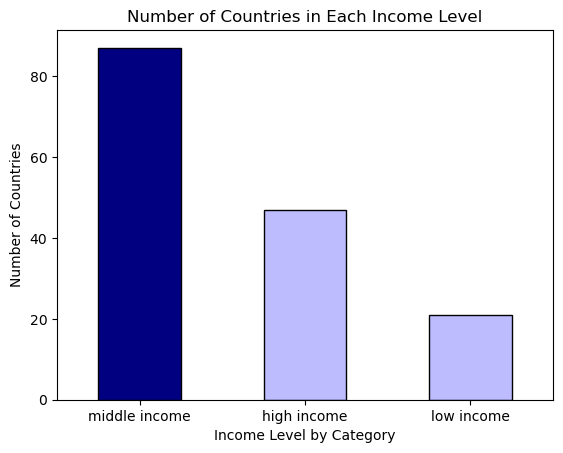

In [93]:
#NUMBER OF COUNTRIES IN EACH CATEGORY
#with help from https://pythontic.com/pandas/series-plotting/bar%20chart#:~:text=In%20the%20same%20way%2C%20to,plot%20member.
level_by_tot = country_by_name_il['level'].value_counts()
level_by_tot.plot.bar(rot= 0,title="Number of Countries in Each Income Level", color = ['navy', '#BCBCFF', '#BCBCFF'], edgecolor ='black')
plt.xlabel('Income Level by Category')
plt.ylabel('Number of Countries');

##### At the start of the pandemic, majority of the countries were considered middle income.

In [94]:
low_income_data = merged_dfs[merged_dfs['country'].isin(low_income_countries)]
mid_income_data =  merged_dfs[merged_dfs['country'].isin(middle_income_countries)]
high_income_data =  merged_dfs[merged_dfs['country'].isin(high_income_countries)]

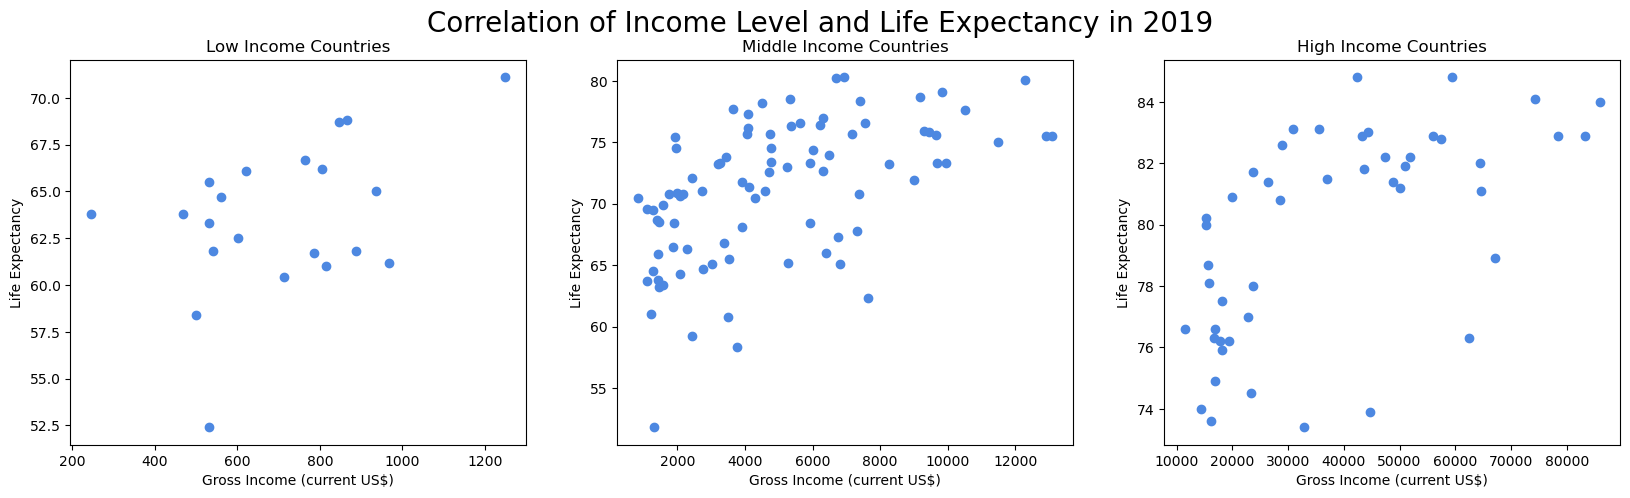

In [95]:
#scatter plot of gni vs life expectancy by income level in 2019
fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize=(20,5))
ax[0].scatter(low_income_data['2019_gni'],low_income_data['2019_life'], color = '#4d88e1')
ax[0].set_xlabel("Gross Income (current US$)")
ax[0].set_ylabel("Life Expectancy")
ax[0].set_title("Low Income Countries")

ax[1].scatter(mid_income_data['2019_gni'], mid_income_data['2019_life'], color = '#4d88e1')
ax[1].set_xlabel("Gross Income (current US$)")
ax[1].set_ylabel("Life Expectancy")
ax[1].set_title("Middle Income Countries")

ax[2].scatter(high_income_data['2019_gni'], high_income_data['2019_life'], color = '#4d88e1')
ax[2].set_xlabel("Gross Income (current US$)")
ax[2].set_ylabel("Life Expectancy")
ax[2].set_title("High Income Countries")

fig.suptitle("Correlation of Income Level and Life Expectancy in 2019", fontsize = 20)

plt.savefig('inc v expec by country .png');

##### There is a positive, linear association between gross income and life expectancy. As gross income increases, life expectancy also increases for all countries. However, for low income and middle income countries, the association isnt as strong as it appears to be for middle income countries.

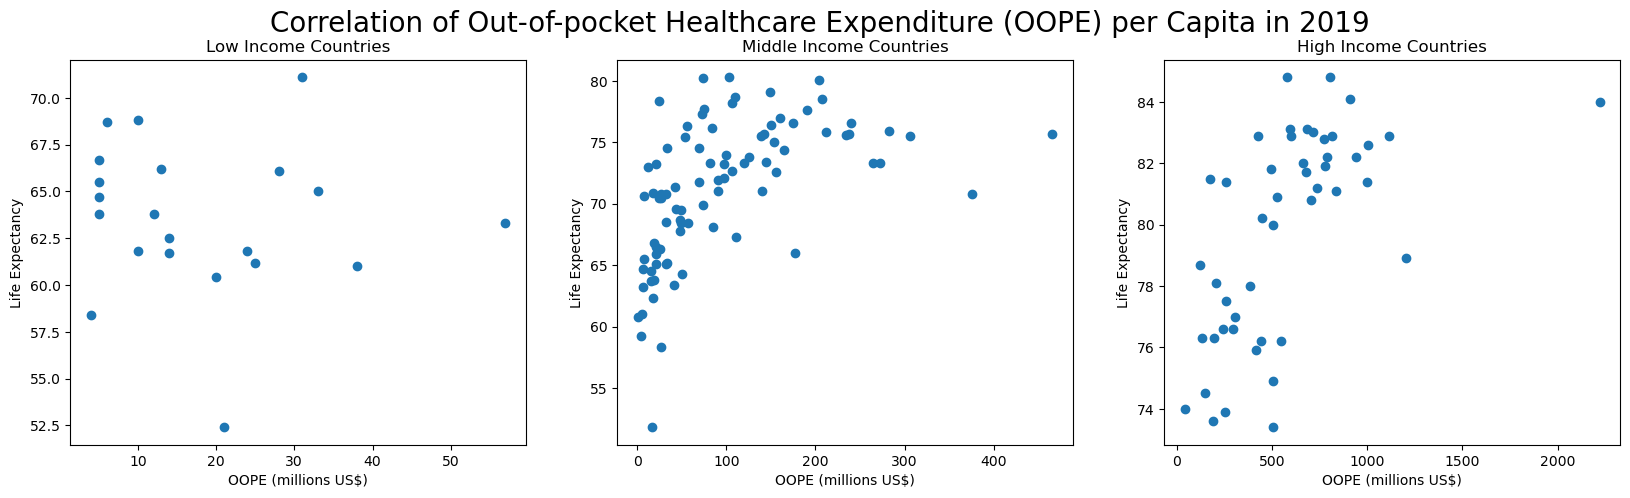

In [96]:
#scatter plot of oope vs life expectancy by income levels in 2019
fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize=(20,5))
ax[0].scatter(low_income_data['2019'],low_income_data['2019_life'])
ax[0].set_xlabel("OOPE (millions US$)")
ax[0].set_ylabel("Life Expectancy")
ax[0].set_title("Low Income Countries")

ax[1].scatter(mid_income_data['2019'], mid_income_data['2019_life'])
ax[1].set_xlabel("OOPE (millions US$)")
ax[1].set_ylabel("Life Expectancy")
ax[1].set_title("Middle Income Countries")

ax[2].scatter(high_income_data['2019'], high_income_data['2019_life'])
ax[2].set_xlabel("OOPE (millions US$)")
ax[2].set_ylabel("Life Expectancy")
ax[2].set_title("High Income Countries")

fig.suptitle("Correlation of Out-of-pocket Healthcare Expenditure (OOPE) per Capita in 2019", fontsize = 20);

# plt.savefig('subplot.png')

##### There is a positive, linear association between healthcare spending and life expectancy for middle and high income countries. As these countries spend more on healthcare, life expectancy goes up. It is important to note that just because life expectancy goes up when a country is spending more on healthcare, high healthcare expenditure it not direct causitive factor for having high life expectancy. Low income countries do not seem to have a correlative relationship with healthcare spending and life expectancy.

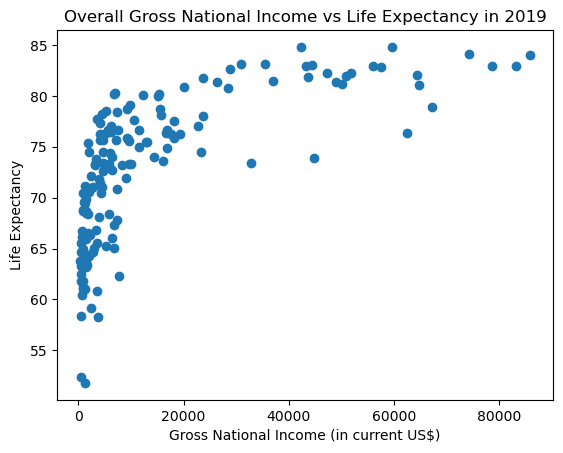

In [97]:
#income vs life expectancy overall
plt.scatter(merged_dfs['2019_gni'], merged_dfs['2019_life'])
plt.xlabel('Gross National Income (in current US$)')
plt.ylabel('Life Expectancy')
plt.title('Overall Gross National Income vs Life Expectancy in 2019')
plt.savefig('overall inc v expec.png');

##### There is an observed relationship between gross national income (GNI) and life expectancy of all countries during 2019. The shape of the graph denotes a positive association that is nonlinear and strong. The shape also suggests that the rate of which life expectancy increases when GNI increase may indicate an  imbalance of income levels. Overall in 2019, income level and life expectancy was moderately correlated.


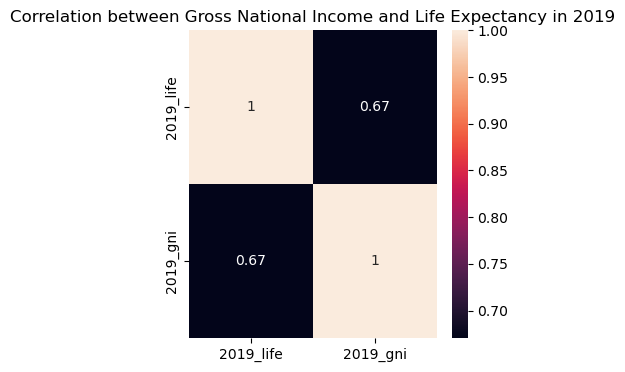

In [98]:
#finding GNI and life expectancy correlation with heatmap
plt.figure(figsize=(4, 4))
sns.heatmap(merged_dfs[['2019_life', '2019_gni']].corr(), annot=True)
plt.title("Correlation between Gross National Income and Life Expectancy in 2019");

##### The correlation coeffecient of 0.67 indicates there is a positive relationship between life expectancy and gross national income. As one increases(income), the next one(life expectancy) increases moderately.

## Conclusions and Recommendations

The relationship between income and life expectancy was positively correlated in 2019. Although it is not the direct cause of life expectancy, income levels did have an effect on life expectancy outcomes at the start of the pandemic. Countries across all income levels demonstrated that earning more income is linked to higher life expectancy.

Being able to pay for out-of-pocket healthcare expenditure was also shown to be linked to life expectancy rate. Both middle and high-income countries had a positive relationship between life expectancy increasing the more money was spent on healthcare. While healthcare spending itself is not the direct reason why someone’s life expectancy can increase, countries where people did not have financial barriers suggest that being able to pay for healthcare is one of the many factors contributing to a longer life.

Comprehensive solutions such as implementing policies like universal healthcare for all, and increased minimum wages could effectively remedy the disparities found between income, poverty, and wealth. I encourage all legislative officials to address and resolve other socioeconomic inequalities that are factors of this disparity as well. By passing strategic income and health legislation, policymakers can help bridge income level imbalances and positively improve health outcomes for their citizens.

Moving forward, it is imperative that these considerations remain at the forefront of legislative a.gendas
